In [ ]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
#load the data 
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab
df = pd.read_csv("kidney_disease.csv")
    
#Print the first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Get the shape of the data (the number of rows & columns)
df.shape

(400, 26)

In [ ]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [ ]:
#Split the data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [ ]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [ ]:
#Build The model

model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=X_train.shape[0]) 

Epoch 1/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 11/2000

In [ ]:
#Save the model
model.save("ckd.model")

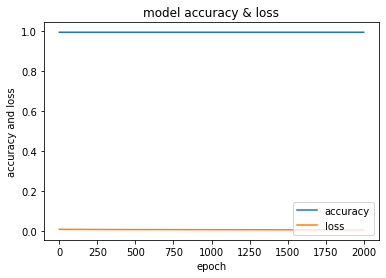

In [ ]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()


In [ ]:
print("---------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
---------------------------------------------------------


In [ ]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  ckd.model
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - accuracy: 1.0000

Original  : 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1

Predicted : 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1

Scores    : loss =  0.004145469982177019  acc =  1.0
---------------------------------------------------------



In [26]:
pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [28]:
%mkdir templates -p

In [38]:
%%writefile templates/index.html
<html lang="en">

<head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <script type="text/javascript" src="http://ajax.googleapis.com/ajax/libs/jquery/1.6.2/jquery.min.js"></script>
    
    <!-- Bootstrap CSS -->
    <link href="{{ url_for('static',filename = 'css/bootstrap.min.css')  }}" rel="stylesheet">

    <title>Machine Learning Lab</title>

<style>

       .form1 {
            /* background: #000000; */
            display: flex;
            justify-content: center;
            align-items: center;
            height: fit-content;
            flex-direction: column;
            /* width: 500px; */
            border-left-width: 250px;
            border: 2px solid #ccc;
            /* padding: 30px; */
            background: white;;
            /* border-radius: 15px; */
            /* margin-right: 100px; */
        }

         .a{
        color:black;
        background-color: skyblue;

         }
         body{
    background-color: lightblue;
}
  

</style>

</head>

<body >
    <nav style="width: 100%;" class="navbar navbar-dark bg-secondary">
         <a class="  navbar-brand" href="#" style="margin-left: 0px; margin-top: 0px; margin-right: 0px; margin-botttom: 0px;">
             <img style="max-height: auto; width:100%;border-radius: 25px;" src="{{ url_for('static',filename = 'image/PIET logo with tagline.jpg')  }}" 
             class="img-responsive" style="margin-top:0px;style=width: auto; height: auto; min-width:100%; min-height: auto;"><center>
                <a href="/aboutusnew" style="color: red; margin-right: 10px;">ABOUT US</a>
                </center>
      </div>
           
        </a>
        
    </nav>

    <div class="container-fluid">
        <div class="row">
            <div style="border-radius: 25px;" class="col-5 d-none d-sm-block d-sm-none d-md-block d-md-none d-lg-block">

                <img src="https://ml8ygptwlcsq.i.optimole.com/fMKjlhs.QRSi~1ce64/w:1000/h:628/q:mauto/https://www.unite.ai/wp-content/uploads/2021/12/robot-headphones.jpg")  }}" class="img-fluid"
                    style="width: auto; height: 200px; min-width: 400px;min-height: 300px;">

            </div>
            
            <div class="col-xs-12 col-sm-12 col-md-12 col-lg-7 " style=" padding: 30px;">
                <h1  style="color:#000000"><B> <i>Major Project Based On Kidney_Disease_Prediction<B><i></h1>
                <br><br>
                <p style="font-size:20px;text-align:justify; color: #808000"><i>It is a Internship project developed at Summer internship 2022 at poornima Institute of Engineering & technology, Jaipur.This  Summer Internship 2022 on Artificial intelligence and Data Science was conducted from 27 June 2022 to 14 August 2022</i>  </p>
              
                
                <br><br>
                
            </div>
        </div>
    </div>

    <div class="container">
        <div class="row">
            <div class="col-xs-12 col-md-12">
                <div class="card mb-3">

                 <div class="a">
        <marquee behavior="left" direction=""><B>MAJOR PROJECT based on Kidney_Disease_Prediction</B></marquee>
    </div>
 
                        <div class="card-body">
                            <h5 class="card-title"; style="text-align:center">Model Deployment</h5>
                           
                            <!-- Main Input For Receiving Query to our ML -->
   <div class="form1" style="border-radius: 25px;">
        <form action="{{ url_for('predict')}} "method="get" class="row g-3 my-4">

            <div class="col-12" style="color: #000; border-radius: 25px;">
                <label for="floatingInput" class="form-label">age</label>
                <input type="number" class="form-control" id="age" name="age" step="any" min="12" max="100" required="required" placeholder="Enter Age">
            </div>
         <br>
         <br>

            
            <div class="col-12" style="color: #000;">
                <label for="floatingInput" class="form-label">sex</label>
                <select id="sex" name ="sex" class="form-select" required>
                    <option value="1">MALE</option>
                    <option value="0">FEMALE</option>
                </select>
            </div>
            <br>
            <br>
            


            <div class="col-12" style="color: #000;">
                <label for="floatingInput" class="form-label">chest_pain</label>
                <input type="number" class="form-control" id="chest_pain" name="chest_pain" step="any" required="required" min="0" max="4" placeholder="Enter the chest pain level">
            </div>
            <br>
            <br>


            <div class="col-12" style="color: #000;">
                <label for="floatingInput" class="form-label">bp</label>
                <input type="number" class="form-control" id="bp" name="bp" step="any" required="required" min="80" max="180" placeholder="Enter the bp Score">
            </div>
            <br>
            <br>
            
            <div class="col-12" style="color: #000;">
                <label for="floatingInput" class="form-label">st</label>
                <input type="number" class="form-control" id="st" name="st" step="any" required="required" min="0" max="6" placeholder="Enter the depression level">
            </div>
            <br>
            <br>


            <div class="col-md-4" style="color: #000;">
                <label for="inputState" class="form-label">Choose a Model</label>
                <select id="Model" name ="Model" step = "any" class="form-select" required>
                    <option selected>Random Forest Classifier</option>
                    <option>Decision Tree Classifier</option>
                    <option>KNN Classifier</option>
                    <option>SVM Classifier</option>
                    <option>Naive Bayes Classifier</option>
                </select>
            </div>
            <br>
            <br>

            <div class="col-12">
                <center>
                <button type="submit" value="NB" name="NB" class="btn btn-outline-primary">Submit</button>
            </center>
            </div>
            <br>
        </form>
        
        
        <p style="color: black;">
          {{prediction_text}}
          {{extra_text}}
        </p>

    </div>


                        </div>
            
            
                    </div>
                </div>
            </div>
           
    <br>
    
    <div class="col-md-12">
              <center><h3 class="section-title" style="text-align: center; color:black;">Sponsored By</h3></center>
            </div>
          
          <br>
          <br>
    
      <div class="container">
        <div class="row">
            <div class="col-xs-12 col-md-4">
                <div class="card mb-3">
            
                    <div class="card">
                        <img style="max-height: 200px; border-radius: 25px;" src="{{ url_for('static',filename = 'image/AICTEIdeaLabFooterLogo.png')  }}"
                            class="card-img-top" alt="...">
                        <div class="card-body">
                            <h5 class="card-title" style="text-align:center">IDEA LAB</h5>
                            
                        </div>
            
            
                    </div>
                </div>
            </div>
            
            <div class="col-xs-12 col-md-4">
                <div class="card mb-3">
            
                    <div class="card">
                        <img style="max-height: 200px; border-radius: 25px;" src="{{ url_for('static',filename = 'image/nbanew.png')  }}"
                            class="card-img-top" alt="...">
                        <div class="card-body">
                            <h5 class="card-title" style="text-align:center">NBA</h5>
                            
                        </div>
            
            
                    </div>
                </div>
            </div>
            
            <div class="col-xs-10 col-md-3">
                <div class="card mb-3">

                    <div class="card">
                        <img style="max-height: 200px; border-radius: 25px;"
                            src="{{ url_for('static',filename = 'image/aicte-logo.png')  }}"
                            class="card-img-top" alt="...">
                        <div class="card-body">
                            <h5 class="card-title"; style="text-align:center; color:black;">AICTE MODROB DEEP LEARNING LAB</h5>
                            
                        </div>

                    </div>

                </div>
            </div>
        
               
    
    <br><br><br><br><br>
    <div class="fixed-bottom ">
        <div class="bg-secondary " style="min-height: 40px;">

            <marquee style="background-color:skyblue; color:Black; margin-top: 7px;">
                <h9>Developed by KAVITA PAHADIYA , Student of PGI</h9>
            </marquee>
        </div>
    </div>
    <!-- change later-->
    <script src="{{ url_for('static',filename = 'js/bootstrap.bundle.min.js')  }}"></script>

</body>

</html>



Overwriting templates/index.html


In [30]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 5.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=100a510a87ed80217fc3998542c4f3d505b8129717b7ac0f97f1892e29212aa9
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [34]:
!ngrok authtoken 2CT4n39kYHzMXqRLBOOxkjHNsl3_5NR4Lb8VMEVAAWuHTEo44

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import numpy as np
import pickle


app = Flask(__name__)
run_with_ngrok(app)

    
model_RF=pickle.load(open('/content/drive/My Drive/Major_RF.pkl', 'rb')) 
model_KNN=pickle.load(open('/content/drive/My Drive/Major_KNN.pkl', 'rb')) 
model_K_SVM=pickle.load(open('/content/drive/My Drive/Major_SVM_linear.pkl', 'rb')) 
model_DT=pickle.load(open('/content/drive/My Drive/Major_DT.pkl', 'rb')) 
model_NB=pickle.load(open('/content/drive/My Drive/Major_NB.pkl', 'rb')) 



@app.route('/')
def home():
  
    return render_template("index.html")
#------------------------------About us-------------------------------------------
("name=kavita pahadiya")
@app.route('/aboutusnew')
def aboutusnew():
    return render_template('aboutusnew.html')
  
@app.route('/predict',methods=['GET'])

def predict():
    
     
    age = float(request.args.get('age'))
    sex = float(request.args.get('sex'))
    chest_pain = float(request.args.get('chest_pain'))
    bp = float(request.args.get('bp'))
    st = float(request.args.get('st'))

    Model = (request.args.get('Model'))

    if Model=="Random Forest Classifier":
      prediction = model_RF.predict([[age, sex, chest_pain, bp, st]])

    elif Model=="Decision Tree Classifier":
      prediction = model_DT.predict([[age, sex, chest_pain, bp, st]])

    elif Model=="KNN Classifier":
      prediction = model_KNN.predict([[age, sex, chest_pain, bp, st]])

    elif Model=="SVM Classifier":
      prediction = model_K_SVM.predict([[age, sex, chest_pain, bp, st]])

    else:
      prediction = model_NB.predict([[age, sex, chest_pain, bp, st]])

    
    if prediction == [0]:
      return render_template('index.html', prediction_text="NO kidney  disease", extra_text =" -- Prediction by " + Model)

    else :
      return render_template('index.html', prediction_text='kidney disease', extra_text =" -- Prediction by " + Model)

app.run()
# if __name__ == "__main__":
#     app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://57b6-35-196-162-209.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [21/Aug/2022 13:25:26] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2022 13:25:27] "GET /static/js/bootstrap.bundle.min.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2022 13:25:27] "GET /static/image/AICTEIdeaLabFooterLogo.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2022 13:25:27] "GET /static/image/aicte-logo.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2022 13:25:27] "GET /static/image/nbanew.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2022 13:25:27] "GET /favicon.ico HTTP/1.1" 404 -
ERROR:__main__:Exception on /aboutusnew [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in 